### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [116]:
df = pd.read_csv('data/telco_churn_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [118]:
# Drop what amounts to an index, and rows with far fewer values
df = df.drop(['Customer ID', 'Churn Category', 'Churn Reason', 'Customer Satisfaction'], axis=1)

In [119]:
# Encode all non-numeric columns as labels
for c in df.columns[np.where( df.dtypes == object)]:
    df[c]=LabelEncoder().fit(df[c]).transform(df[c])

18


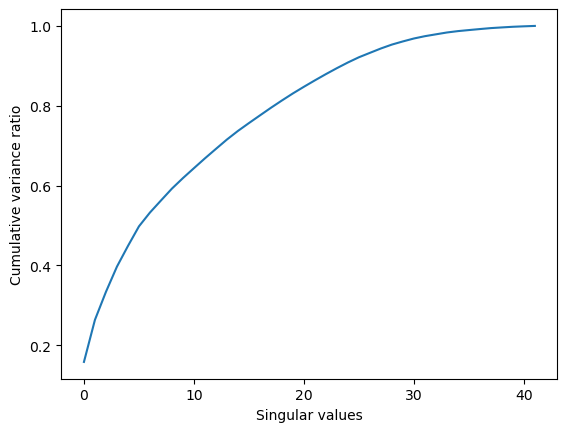

In [133]:
pca = PCA().fit((df-df.mean())/df.std())
plt.plot(np.arange(len(df.columns)),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Singular values')
plt.ylabel('Cumulative variance ratio')
print(np.where(np.cumsum(pca.explained_variance_ratio_)>.8)[0][0])

In [134]:
data = PCA(n_components=13).fit_transform((df-df.mean())/df.std())

km = KMeans(n_clusters=4, n_init = 100).fit(data)

In [103]:
db = DBSCAN(eps=5.5).fit((df-df.mean())/df.std())

In [135]:
px.scatter_3d(data, data[:,0],data[:,1],data[:,2], color=km.labels_)

In [136]:
km.inertia_

140635.25630682908

In [149]:
odf = pd.read_csv('data/telco_churn_data.csv')
odf['ClusterLabel'] = km.labels_
odf['ClusterLabel'].value_counts()

3    2012
0    1756
1    1733
2    1542
Name: ClusterLabel, dtype: int64

In [166]:
px.histogram(odf, y='Referred a Friend', color='ClusterLabel')

In [173]:
odf.query('ClusterLabel != 3')['ClusterLabel'] = 0
odf.query('ClusterLabel == 3')['ClusterLabel'] = 1
odf.corr()

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,...,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,ClusterLabel
Number of Referrals,1.000000,0.326975,0.006336,0.024131,0.016020,0.250378,0.024756,0.086958,0.216190,-0.025141,...,0.001463,0.018715,-0.009893,-0.007704,-0.286540,0.122843,-0.140121,-0.112472,0.263029,0.357113
Tenure in Months,0.326975,1.000000,0.014596,0.031410,0.231389,0.826074,0.059021,0.330911,0.674149,0.009927,...,0.007146,0.011963,-0.009672,-0.012102,-0.352861,0.396292,-0.200989,-0.155561,0.306166,0.632165
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.029658,0.138439,0.069500,-0.018644,0.028602,0.599828,-0.011749,...,0.005894,0.002631,-0.004341,-0.018665,0.008120,0.023858,0.016678,-0.001392,0.002773,0.117643
Avg Monthly GB Download,0.024131,0.031410,-0.029658,1.000000,0.392364,0.208882,0.001431,0.404215,0.000372,-0.373632,...,-0.012029,-0.029457,0.032105,0.027487,0.094932,0.016595,0.064806,0.048205,-0.092567,-0.050537
Monthly Charge,0.016020,0.231389,0.138439,0.392364,1.000000,0.636000,0.032154,0.319583,0.235441,0.148281,...,-0.011074,-0.031429,0.028829,0.011412,0.232339,0.092075,0.119970,0.103774,-0.244160,0.083818
Total Regular Charges,0.250378,0.826074,0.069500,0.208882,0.636000,1.000000,0.039558,0.441563,0.610185,0.059684,...,0.001978,-0.002784,0.003811,-0.006434,-0.198546,0.341947,-0.118745,-0.087749,0.153739,0.604573
Total Refunds,0.024756,0.059021,-0.018644,0.001431,0.032154,0.039558,1.000000,0.024248,0.028113,0.024168,...,-0.003797,-0.009901,-0.000597,0.019627,-0.033709,0.007992,-0.010620,-0.012822,0.035606,0.025716
Total Extra Data Charges,0.086958,0.330911,0.028602,0.404215,0.319583,0.441563,0.024248,1.000000,0.244896,-0.140663,...,0.002506,-0.008546,0.005964,0.018185,0.006227,0.127702,0.014048,-0.000883,0.006571,0.275130
Total Long Distance Charges,0.216190,0.674149,0.599828,0.000372,0.235441,0.610185,0.028113,0.244896,1.000000,0.003065,...,0.005063,0.008029,-0.006923,-0.018640,-0.223756,0.282189,-0.120352,-0.097072,0.208038,0.503691
Age,-0.025141,0.009927,-0.011749,-0.373632,0.148281,0.059684,0.024168,-0.140663,0.003065,1.000000,...,-0.008183,-0.010305,0.007612,-0.018881,0.115760,-0.001826,0.063407,0.042983,-0.119243,-0.076593
